## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/home/christian/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/christian/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


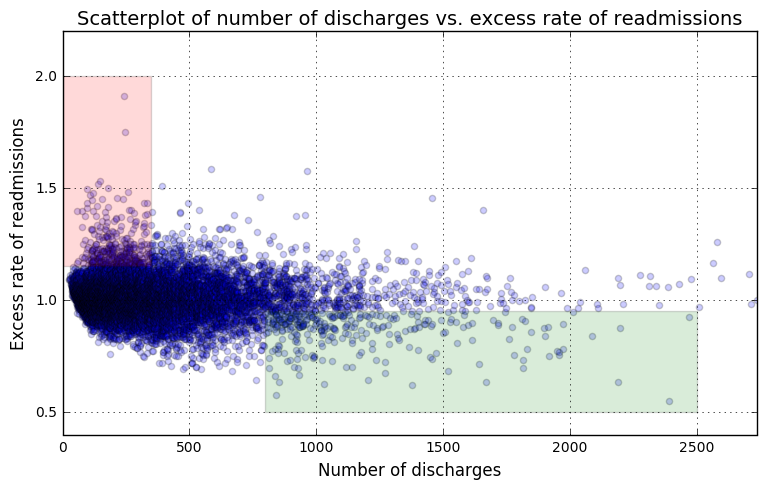

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
len(clean_hospital_read_df)

11578

### Do you agree with the above analysis and recommendation?

No the above analysis is extremely week. First of all it talks about a decreasing trend, but visually this seems to only be confirmed by focusing on a few outliers of small discharge numbers and large discharge numbers, completely ignoring the very large amount of data points that make up the bulk of the data.
While there may be a difference, there is no actual analysis; no attempt to fit a line or statistically quantify the difference in these means. The conclusions are not made with respect to any actual inferential statistic or fitting, nor is there any rationale given for the choice of small and large hospital cutoffs. Concluding there is a 'strong correlation' when visually it appears weak at best, and without actually trying to quantify it means the conclusions are not trustworthy. 
Furthermore, the recommendation then makes a sugggestion for hospitals with a small capacity of < 300, but there is no logic or indication of where this cut off was derived. It also makes a very bold recommendation of forcing hospitals to demonstrate upgraded resources and providing incentives to consolidate hospital facilities, which do not directly follow from the analysis. Not enough evidence or analysis was presented for either of the recommendations to be appropriate recommendations. While this project is assigned before one has done linear regressions, it doesn't make sense to discuss a trend without including the bulk of your data, as recommendations will affect these facilities as well as the others. Therefore, we will conduct a ANOVA test to analyse the difference between small, medium and large hosptials.

### Provide support for your arguments and your own recommendations with a statistically sound analysis:


In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


First we'd like to change the two groups under investigation to three, in order to better match the groupings we see visually. 

In [23]:

group1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
group3 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 700]
group2 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 600) & 
                                (clean_hospital_read_df['Number of Discharges'] > 450)]
n1 = len(group1)
n2 = len(group2)
n3 = len(group3)
print(len(group1))
print(len(group2))
print(len(group3))
print('total size of population: ', len(clean_hospital_read_df['Excess Readmission Ratio'].dropna()))
import scipy.stats as stats
mean1 = group1['Excess Readmission Ratio'].dropna().mean()
mean2 = group2['Excess Readmission Ratio'].dropna().mean()
mean3 = group3['Excess Readmission Ratio'].dropna().mean()
print(group1['Excess Readmission Ratio'].dropna().mean())
print(group2['Excess Readmission Ratio'].dropna().mean())
print(group3['Excess Readmission Ratio'].dropna().mean())
print('mean admission ratio of total population, sans NaN values: ', 
      clean_hospital_read_df['Excess Readmission Ratio'].dropna().mean())

1269
1326
1246
total size of population:  11497
1.0226183501683506
1.0020383107089001
0.9894416532905282
mean admission ratio of total population, sans NaN values:  1.0075037835957146


In [24]:
var1 = group1['Excess Readmission Ratio'].dropna().var()
var2 = group2['Excess Readmission Ratio'].dropna().var()
var3 = group3['Excess Readmission Ratio'].dropna().var()
print(group1['Excess Readmission Ratio'].dropna().var())
print(group2['Excess Readmission Ratio'].dropna().var())
print(group3['Excess Readmission Ratio'].dropna().var())

0.0033615184329960682
0.01013295438023848
0.012738173436300577


Now our variances are not all the same, so we can't know we can't use the usual normal one-way ANOVA, and instead will use Welch's ANOVA or a Kruskal-Wallis test. First we need to check for normality though.

In [25]:
ratio1 = group1['Excess Readmission Ratio'].dropna()
ratio2 = group2['Excess Readmission Ratio'].dropna()
ratio3 = group3['Excess Readmission Ratio'].dropna()

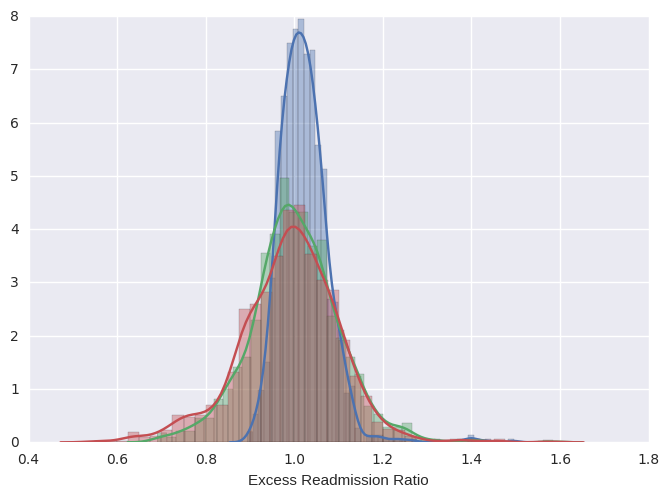

In [26]:
sns.distplot(ratio1)
sns.distplot(ratio2)
sns.distplot(ratio3)

((array([-3.24692919, -2.98544921, -2.83977007, ...,  2.83977007,
          2.98544921,  3.24692919]),
  array([ 0.8935,  0.9012,  0.9033, ...,  1.4088,  1.4333,  1.4953])),
 (0.054403459797663631, 1.0226183501683503, 0.93648942745920927))

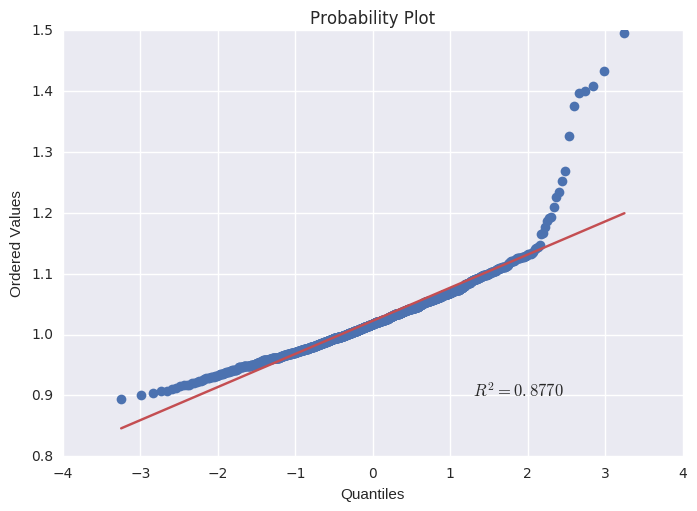

In [27]:
stats.probplot(ratio1, dist="norm", plot=plt)

((array([-3.27806921, -3.01889206, -2.87463956, ...,  2.87463956,
          3.01889206,  3.27806921]),
  array([ 0.6905,  0.6914,  0.6994, ...,  1.4033,  1.4321,  1.5836])),
 (0.10006618023723522, 1.002038310708899, 0.99229349798400002))

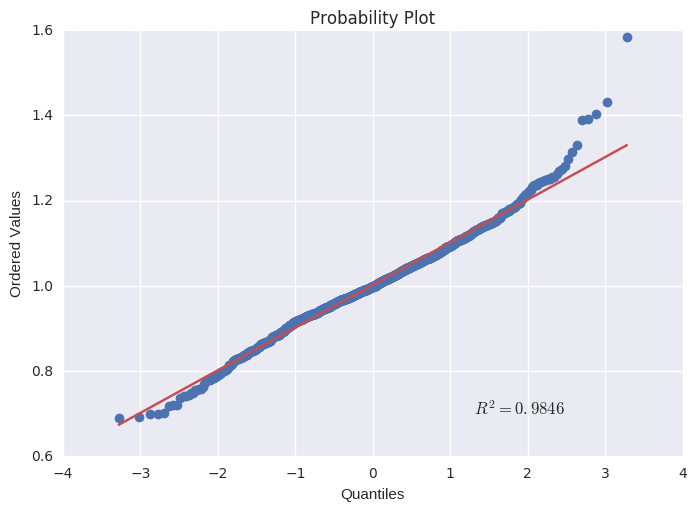

In [28]:
stats.probplot(ratio2, dist="norm", plot=plt)

((array([-3.26046769, -2.99999378, -2.85493841, ...,  2.85493841,
          2.99999378,  3.26046769]),
  array([ 0.5495,  0.5748,  0.6195, ...,  1.4543,  1.4612,  1.576 ])),
 (0.11186182241594218, 0.98944165329052991, 0.98925118260581291))

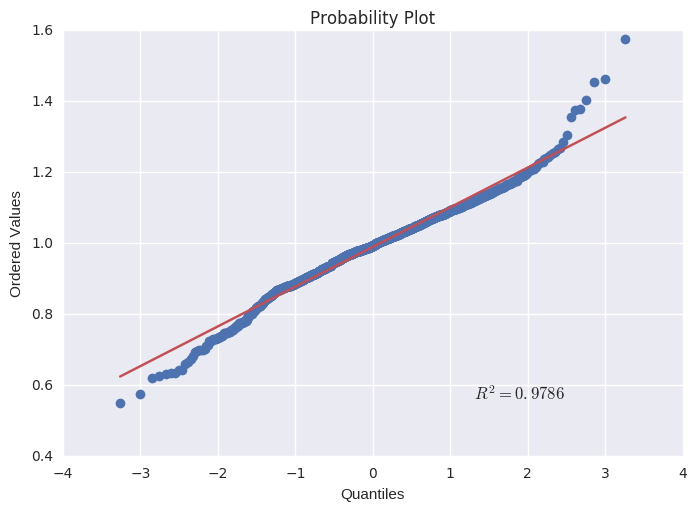

In [29]:
stats.probplot(ratio3, dist="norm", plot=plt)

Visually, the hisogram seems to show that all three distributions are gaussian, the probability plot for the small hospitals has a weaker determination coefficient ($R^2$) than I'd like. There are a lot of outliers at the end. Perhaps we can remedy this by shifting our first group to only start at 100 discharges and go to about 150. So still smaller facilities, but a different subset. 

If one does however, the improvement ($R^2 \approx 0.90) doesn't bring it up to the level of the other two groups.  

So this helps, but there is still is still a lot of variance not explained by regressing to a gaussian distribution. Personally, I will proceed by performing both a Kruskal-Wallis test, and not a Welch F-test, being aware that the latter may be affected by only weakly meeting the critieria of all samples being drawn from a normal distribution. 

In [30]:
stats.kruskal(ratio1,ratio2,ratio3)

KruskalResult(statistic=72.531245565234656, pvalue=1.7784437876272708e-16)

We find a pvalue of $1.8 \times 10^{-16}$, which is much lower than the given $\alpha = 0.01$. Thus we conclude that there is a significant difference between at least two of the means. We need to perform a post-hoc test to determine which of the means is statsitically different. Unfortunately, scipy.stats doesn't seem to have any appropriate built in post-hoc tests for the Kruskal-Wallis test (or indeed for many ANOVA tests). Since I didn't feel like coding the test from scratch, and knowing someone would have already done it, I looked to see if there was some other library which included Post-hoc tests. The following function performs the exact same calculation as above but also includes the results of Dunn's test. The code was found through google at : https://gist.github.com/alimuldal/fbb19b73fa25423f02e8. Interestingly it doesn't look like it's been incorporated into any major libraries. 

In [31]:
from dunn import kw_dunn
kw_dunn([ratio1,ratio2,ratio3], to_compare = [(0,1),(0,2),(1,2)],alpha = 0.01)

(72.531245565234656,
 1.7784437876272708e-16,
 array([ 6.31742696,  8.16256685,  1.99265686]),
 array([  7.97862187e-10,   9.83936820e-16,   1.38897103e-01]),
 array([ True,  True, False], dtype=bool))

Dunn's test is testing the difference between rank sums, assuming the groups have different variances (unlike the Nemenyi test for instance). 
Our out put includes both the H-stastic and p-value as before, but then also three arrays which correspond to Z-scores between the difference in mean ranks for each pair-wise comparison, corrected p-values for each pair, and a boolean array which is true for pairs where the null hypothesis can be rejected at the given alpha. 

Thus, we see that there is a statistically significant difference between our sample of small hospitals and our sample of large and medium hospitals. That is, at the confidence level required ($\alpha =0.01$) we are confident that the difference in readmission ratios found in the 'small' group is due to random variation less than one percent of the time. We note that the p-value for the difference between small and medium hospitals is substantially higher than for the comparison between small and large. 

We reject the null hypothesis that number of discharges has no bearing on readmission rate. There is in fact a statistically significant correlation between hospital capacity (number of discharges) and readmission rates, when comparing very small facilities to larger ones. However this trend same level of difference is not found between medium and large hospitals. Therefore, we conclude that smaller hosptials are somehow lacking resources/training to ensure that patients do not require readmissions. 

We recomended working with smaller hospital facilities to identify which resources required upgrades. We also recommended this be combined with deeper statistical analysis on the available data, attempting to identify what variables medium and larger facilities have in common, that differentiate them from small hospitals. 

In contrast to the original analysis, we do NOT suggest providing incentices to consolidate the number of hospitals into larger facilities. The difference between these two groups was not found to be statstically significant at the required confidence level. It is also unclear if merel consolidating hospitals will lead to an increase of quality of care. Instead, we should take a look at recently consolidated hosptitals, and attempt to identify any patterns in their allocation of new found resources which may impact quailty of care.
